In [39]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [40]:
data = pd.read_csv("insurance.csv")

In [41]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Data Cleaning

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [43]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [44]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Feature Engineering

In [45]:
Male = pd.get_dummies(data['sex'],drop_first = True)
data = pd.concat([data, Male], axis = 1)
data.head()

,age,sex,bmi,children,smoker,region,charges,male
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,True
2,28,male,33.000,3,no,southeast,4449.46200,True
3,33,male,22.705,0,no,northwest,21984.47061,True
4,32,male,28.880,0,no,northwest,3866.85520,True


In [46]:
Smoker = pd.get_dummies(data['smoker'], drop_first = True)
data = pd.concat([data, Smoker], axis = 1)
data.head()

,age,sex,bmi,children,smoker,region,charges,male,yes
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [47]:
data =  data.rename(columns = {'yes' : 'Smoker'})
data.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker
0,19,female,27.900,0,yes,southwest,16884.92400,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False


In [48]:
data['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [49]:
Region = pd.get_dummies(data['region'], drop_first = True)
data = pd.concat([data, Region], axis = 1)
data.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,False,True,False,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False,False,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False,False,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False,True,False,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False,True,False,False


#### Exploratory Analysis

In [50]:
data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

#### Distribution of "Sex" Parameters

/tmp/ipykernel_3511/100804763.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = "sex", data = data, palette = "GnBu")


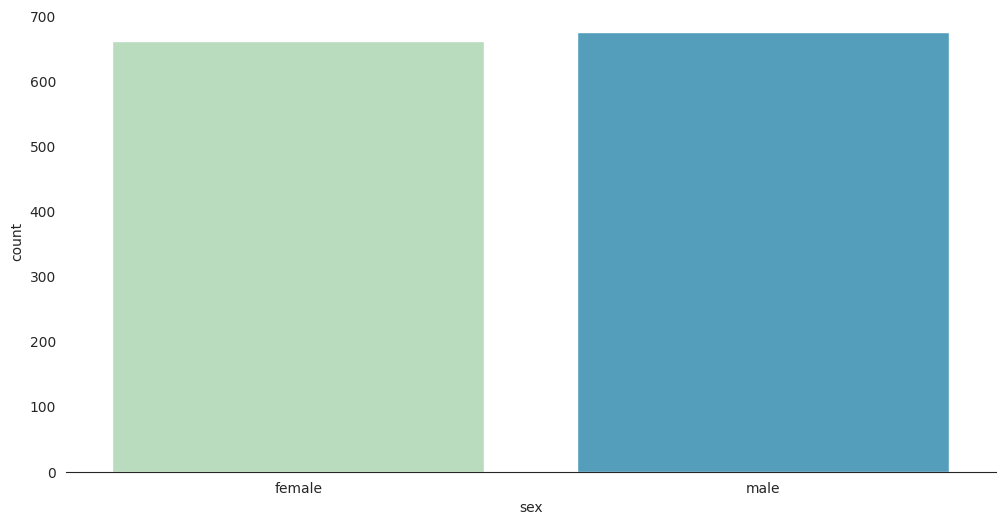

In [51]:
plt.figure(figsize = (12,6))
sns.set_style("white")
sns.countplot(x = "sex", data = data, palette = "GnBu")
sns.despine(left = True)

#### Relationship of smoking and gender to charges

/tmp/ipykernel_3511/441812307.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = "sex", y = "charges", data = data, palette = "GnBu")


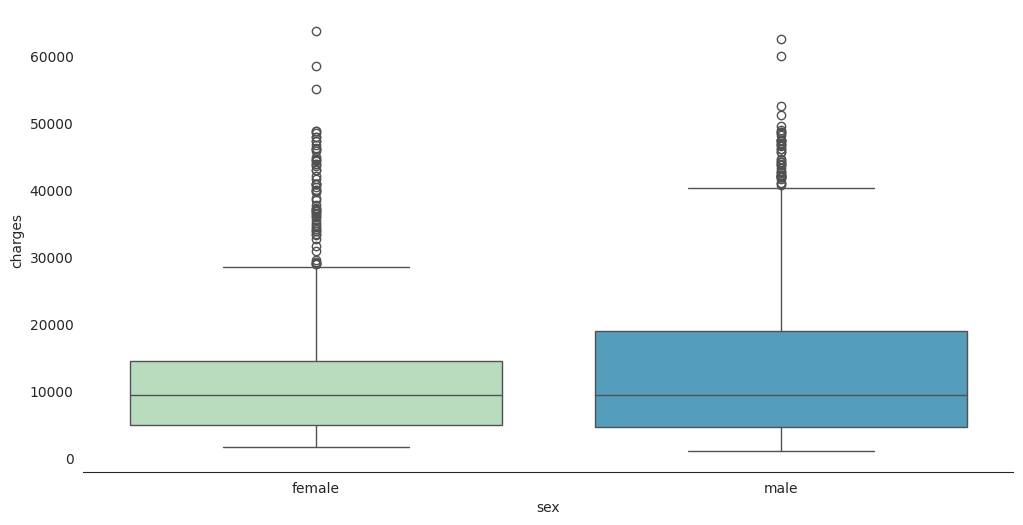

In [53]:
plt.figure(figsize = (12,6))
sns.set_style("white")
sns.boxplot(x = "sex", y = "charges", data = data, palette = "GnBu")
sns.despine(left = True)

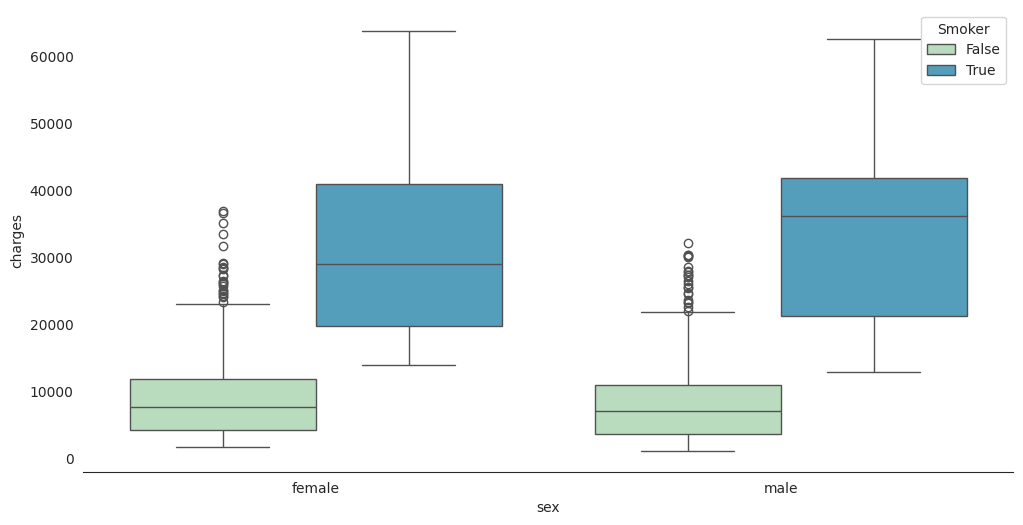

In [56]:
plt.figure(figsize = (12,6))
sns.set_style("white")
sns.boxplot(x = "sex", y = "charges", data = data, palette = "GnBu", hue = "Smoker")
sns.despine(left = True)

<Axes: xlabel='age', ylabel='charges'>

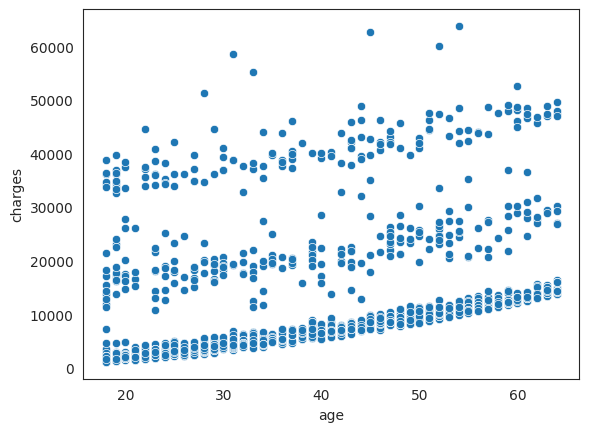

In [57]:
sns.scatterplot(x="age", y = "charges" , data= data)

<Axes: xlabel='age', ylabel='charges'>

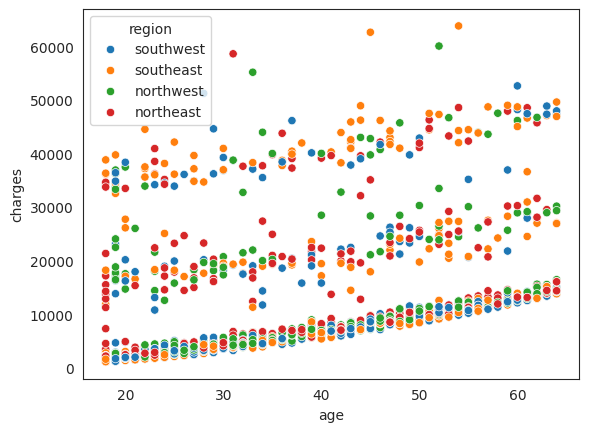

In [58]:
sns.scatterplot(x="age", y = "charges" , data= data , hue ="region")

<Axes: xlabel='age', ylabel='charges'>

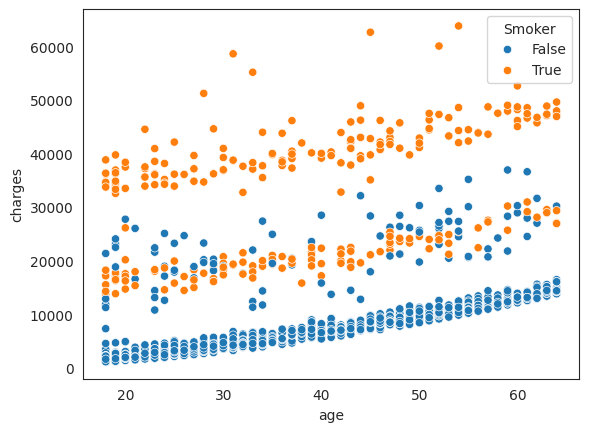

In [60]:
sns.scatterplot(x="age", y = "charges" , data= data, hue= "Smoker")

<Axes: xlabel='bmi', ylabel='charges'>

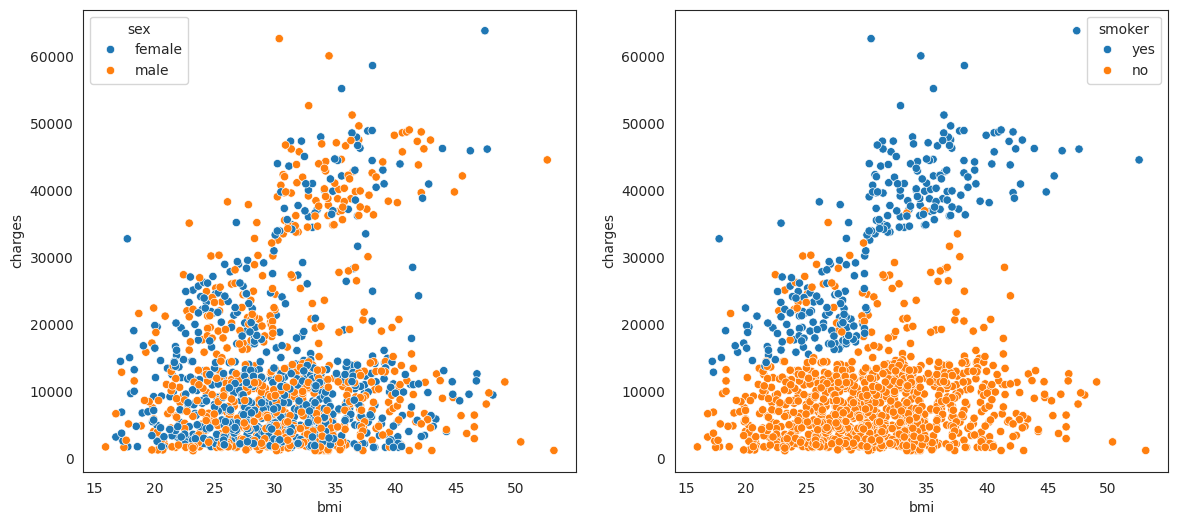

In [65]:
fig, ax = plt.subplots(nrows =1, ncols =2, figsize = (14,6) )
sns.scatterplot(x="bmi", y = "charges" , data= data, hue ="sex" , ax = ax[0] )
sns.scatterplot(x="bmi", y = "charges" , data= data, hue ="smoker", ax = ax[1])

In [66]:
data.head()

,age,sex,bmi,children,smoker,region,charges,male,Smoker,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,False,True,False,False,True
1,18,male,33.770,1,no,southeast,1725.55230,True,False,False,True,False
2,28,male,33.000,3,no,southeast,4449.46200,True,False,False,True,False
3,33,male,22.705,0,no,northwest,21984.47061,True,False,True,False,False
4,32,male,28.880,0,no,northwest,3866.85520,True,False,True,False,False


In [67]:
data.drop(["sex", "smoker", "region"], axis =1 , inplace= True)

In [68]:
data.head()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


<Axes: >

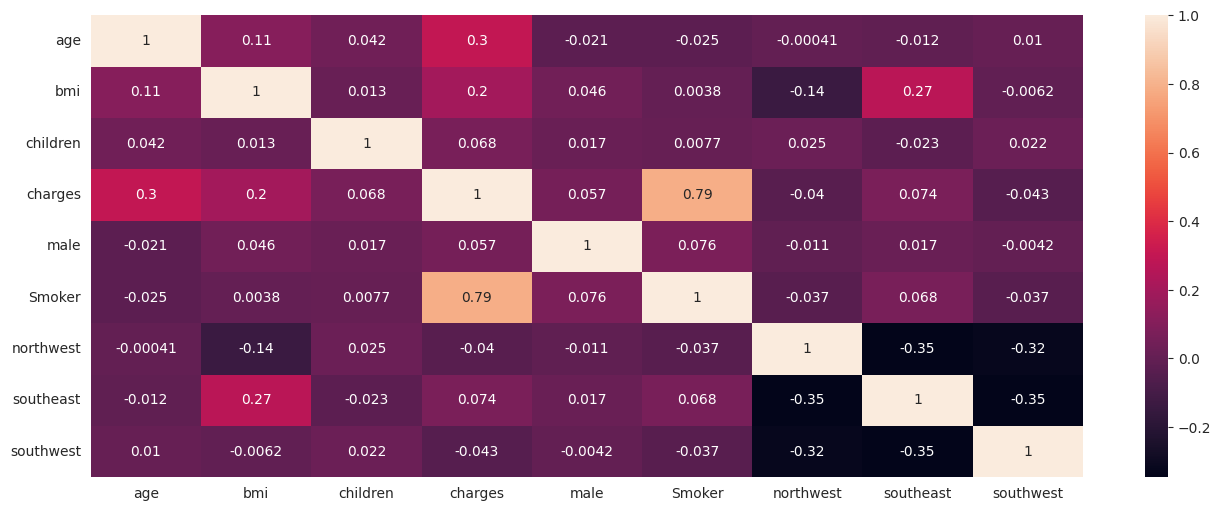

In [69]:
plt.figure(figsize= (16, 6))
sns.heatmap(data.corr(), annot= True)

In [71]:
data.corr()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
charges,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
Smoker,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


#### Splitting the data

In [72]:
x = data.drop("charges", axis = 1)
y =  data["charges"]

In [73]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.4)

In [74]:
x_train.shape

(802, 8)

In [75]:
x_test.shape

(536, 8)

In [76]:
data.head()

,age,bmi,children,charges,male,Smoker,northwest,southeast,southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


#### Scaling the data

In [77]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [89]:
scaled_x_train = scaler.fit_transform(x_train)
scaled_x_test = scaler.transform(x_test)

#### Support Vector Regression Model

In [90]:
from sklearn.svm import SVR

regressor =SVR()
regressor.fit(scaled_x_train, y_train)

SVR()

In [91]:
predict = regressor.predict(scaled_x_test)

In [92]:
predict.shape

(536,)

In [93]:
y_test.shape

(536,)

In [94]:
predict[:10]

array([9192.56444208, 9268.3523878 , 9208.38188547, 9264.3864437 ,
       9246.30127954, 9198.93598049, 9205.2665224 , 9224.74736933,
       9232.12938791, 9255.0104141 ])

In [95]:
y_test[:10]

1137     3176.28770
1304    21259.37795
505      6796.86325
1070    39871.70430
455     21797.00040
1287     5472.44900
814      5584.30570
316      8835.26495
72      11741.72600
741     18246.49550
Name: charges, dtype: float64